In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter

In [172]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# US_Accidents_May19.csv has 2243939 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('~/Downloads/US_Accidents_Dec20.csv', delimiter=',')#, nrows = nRowsRead)
df1.dataframeName = 'US_Accidents_Dec20.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')
df1.columns

KeyboardInterrupt: 

In [78]:
df1.columns
df1 = df1[['ID','Start_Time','End_Time','Start_Lat','Severity','Start_Lng', 'City', 'State',
           'Amenity', 'Bump', 'Crossing','Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition','Airport_Code',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']]
df1 = df1[df1.State=='DC']

df1.to_csv('df1.csv')

In [175]:
#39.037569, -77.169701
#39.018366, -76.886116
#38.782708, -76.902596
#38.787525, -77.245232

df1 = pd.read_csv("df1.csv")
df1["Hours"] = pd.to_datetime(df1.Start_Time).dt.hour
(df1.Hours.values[0])
lightings = [0,4,9,17,21,24]
df1["Lighting"] = pd.cut(df1.Hours, lightings)
df1["Lighting"]

0       (17, 21]
1         (4, 9]
2         (4, 9]
3         (4, 9]
4         (4, 9]
          ...   
6506    (21, 24]
6507    (21, 24]
6508      (4, 9]
6509      (4, 9]
6510    (17, 21]
Name: Lighting, Length: 6511, dtype: category
Categories (5, interval[int64]): [(0, 4] < (4, 9] < (9, 17] < (17, 21] < (21, 24]]

In [176]:
df1.Start_Lat=pd.qcut(df1.Start_Lat, 25)
df1.Start_Lng=pd.qcut(df1.Start_Lng, 25)

In [177]:
set(df1["City"])

{'Bolling Afb',
 'Capitol Heights',
 'Chevy Chase',
 'Fairmount Heights',
 'Naval Anacost Annex',
 'Oxon Hill',
 'Suitland',
 'Takoma Park',
 'Temple Hills',
 'Washington',
 nan}

In [197]:
weather1 = pd.read_csv('~/Downloads/2488653.csv')
weather2 = pd.read_csv('~/Downloads/2488661.csv', delimiter=',')
weather3 = pd.read_csv('~/Downloads/2488664.csv', delimiter=',')

In [198]:
print(weather1.columns)
print(weather2.columns)
print(weather3.columns)
weather1

Index(['STATION', 'NAME', 'DATE', 'AWND', 'MDPR', 'PRCP', 'SNOW', 'SNWD',
       'TAVG', 'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06',
       'WT08', 'WT09', 'WT11'],
      dtype='object')
Index(['STATION', 'NAME', 'DATE', 'AWND', 'DAPR', 'PRCP', 'SNOW', 'SNWD',
       'TAVG', 'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06',
       'WT08', 'WT09', 'WT11'],
      dtype='object')
Index(['STATION', 'NAME', 'DATE', 'AWND', 'MDPR', 'PRCP', 'SNOW', 'SNWD',
       'TAVG', 'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06',
       'WT08', 'WT11'],
      dtype='object')


,STATION,NAME,DATE,AWND,MDPR,PRCP,SNOW,SNWD,TAVG,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11
0,US1MDMG0109,"SILVER SPRING 2.1 NNE, MD US",2016-03-31,NaN,NaN,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1MDMG0109,"SILVER SPRING 2.1 NNE, MD US",2016-04-01,NaN,NaN,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1MDMG0109,"SILVER SPRING 2.1 NNE, MD US",2016-04-02,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1MDMG0109,"SILVER SPRING 2.1 NNE, MD US",2016-04-03,NaN,NaN,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1MDMG0109,"SILVER SPRING 2.1 NNE, MD US",2016-04-04,NaN,NaN,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67303,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2017-12-28,NaN,NaN,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67304,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2017-12-29,NaN,NaN,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67305,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2017-12-30,NaN,NaN,0.03,0.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67306,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2017-12-31,NaN,NaN,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
df_grouped = df1.groupby(['Start_Lat','Start_Lng'])
df1.columns

Index(['Unnamed: 0', 'ID', 'Start_Time', 'End_Time', 'Start_Lat', 'Severity',
       'Start_Lng', 'City', 'State', 'Amenity', 'Bump', 'Crossing',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Airport_Code', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Zipcode', 'Hours',
       'Lighting'],
      dtype='object')

In [180]:
df1

,Unnamed: 0,ID,Start_Time,End_Time,Start_Lat,Severity,Start_Lng,City,State,Amenity,...,No_Exit,Railway,Roundabout,Station,Traffic_Calming,Traffic_Signal,Turning_Loop,Zipcode,Hours,Lighting
0,228620,A-228627,2016-11-30 20:35:42,2016-11-30 21:05:21,"(38.888, 38.892]",2,"(-77.066, -77.05]",Washington,DC,False,...,False,False,False,False,False,False,False,20024,20,"(17, 21]"
1,228640,A-228647,2016-12-01 05:29:50,2016-12-01 06:16:06,"(38.9, 38.903]",2,"(-77.009, -77.008]",Washington,DC,False,...,False,False,False,False,False,True,False,20002-4684,5,"(4, 9]"
2,228644,A-228651,2016-12-01 06:03:47,2016-12-01 06:48:16,"(38.9, 38.903]",2,"(-76.952, -76.943]",Washington,DC,False,...,False,False,False,False,False,True,False,20019,6,"(4, 9]"
3,228648,A-228655,2016-12-01 06:20:45,2016-12-01 07:04:52,"(38.881, 38.882]",2,"(-77.03, -77.027]",Washington,DC,False,...,False,False,False,False,False,False,False,20024,6,"(4, 9]"
4,228680,A-228687,2016-12-01 07:32:10,2016-12-01 08:16:08,"(38.953, 38.992]",2,"(-77.05, -77.039]",Washington,DC,False,...,False,False,False,False,False,False,False,20012,7,"(4, 9]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6506,4226245,A-4233111,2019-08-10 23:40:41,2019-08-11 00:09:54,"(38.934, 38.953]",4,"(-77.027, -77.022]",Washington,DC,True,...,False,False,False,True,False,False,False,20011-7124,23,"(21, 24]"
6507,4226246,A-4233112,2019-08-10 23:40:41,2019-08-11 00:09:54,"(38.934, 38.953]",4,"(-77.027, -77.022]",Washington,DC,False,...,False,False,False,False,False,True,False,20011-7113,23,"(21, 24]"
6508,4228475,A-4235341,2019-08-15 07:25:40,2019-08-15 07:54:19,"(38.9, 38.903]",2,"(-77.039, -77.035]",Washington,DC,False,...,False,False,False,True,False,True,False,20005,7,"(4, 9]"
6509,4228476,A-4235342,2019-08-15 07:25:40,2019-08-15 07:54:19,"(38.9, 38.903]",2,"(-77.035, -77.03]",Washington,DC,True,...,False,False,False,True,False,True,False,20005-2501,7,"(4, 9]"


In [185]:
grouped_removed = []
for name, group in df_grouped:
    group.Start_Time = pd.to_datetime(group.Start_Time)
    #display(group)
    group_new = group.set_index("Start_Time")
    group_new = group_new.resample("240min").sum()
    #print(group_new.columns)
    group_new["Time"] = group_new.index
    group_new["Name"] = str(name)
    group_new["Amenity"] = 1 if group_new["Amenity"].mean() > 0 else 0
    group_new["Bump"] = 1 if group_new["Bump"].mean() > 0 else 0
    group_new["Crossing"] = 1 if group_new["Crossing"].mean() > 0 else 0
    group_new["Give_Way"] = 1 if group_new["Give_Way"].mean() > 0 else 0
    group_new["Junction"] = 1 if group_new["Junction"].mean() > 0 else 0
    group_new["No_Exit"] = 1 if group_new["No_Exit"].mean() > 0 else 0
    group_new["Railway"] = 1 if group_new["Railway"].mean() > 0 else 0
    group_new["Roundabout"] = 1 if group_new["Roundabout"].mean() > 0 else 0
    group_new["Station"] = 1 if group_new["Station"].mean() > 0 else 0
    group_new["Traffic_Calming"] = 1 if group_new["Traffic_Calming"].mean() > 0 else 0
    group_new["Traffic_Signal"] = 1 if group_new["Traffic_Signal"].mean() > 0 else 0
    group_new["Turning_Loop"] = 1 if group_new["Turning_Loop"].mean() > 0 else 0
    group_new["Temperature"] = group_new["Temperature(F)"].mean()
    group_new["Wind_Chill"] = group_new["Wind_Chill(F)"].mean()
    group_new["Humidity"] = group_new["Humidity(%)"].mean()
    group_new["Pressure"] = group_new["Pressure(in)"].mean()
    group_new["Visibility"] = group_new["Visibility(mi)"].mean()
    group_new["Wind_Speed"] = group_new["Wind_Speed(mph)"].mean()
    group_new["Precipitation"] = group_new["Precipitation(in)"].mean()
    
    direction = dict(Counter(group["Wind_Direction"]))
    #print(direction)
    direction = {y:x for x,y in direction.items()}
    direction = direction[max(direction.keys())]
    group_new["Wind_Direction"] = direction
    
    #print(group_new.columns)
    condition = dict(Counter(group["Weather_Condition"]))
    condition = {y:x for x,y in condition.items()}
    condition = condition[max(condition.keys())]
    group_new["Weather_Condition"] = condition
    
    light = dict(Counter(group["Lighting"]))
    light = {y:x for x,y in light.items()}
    light = light[max(light.keys())]
    group_new["Lighting"] = light
    
    #print(group_new.columns)
    group_new = group_new[["Time", 'Name', 'Severity', 'Amenity', 'Bump',
       'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', "Lighting", "Temperature","Wind_Chill","Humidity","Pressure","Visibility","Wind_Speed","Precipitation","Wind_Direction","Weather_Condition"]]
    #print(group_new.columns)
    #print(group_new.columns)
    #print("Weather:",group_new["Weather_Condition"])
    grouped_removed.append(group_new)
    #print(group.mean())
    #break


(array([499.,  62.,  25.,  15.,  12.,   7.,   2.,   0.,   0.,   3.]),
 array([  0. ,  14.5,  29. ,  43.5,  58. ,  72.5,  87. , 101.5, 116. ,
        130.5, 145. ]),
 <BarContainer object of 10 artists>)

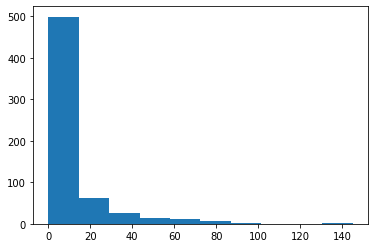

In [192]:
plt.hist(df_grouped.count()["Lighting"].values)

In [187]:
len(grouped_removed)
df_final = pd.concat(grouped_removed, ignore_index=True)
df_final


,Time,Name,Severity,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,...,Lighting,Temperature,Wind_Chill,Humidity,Pressure,Visibility,Wind_Speed,Precipitation,Wind_Direction,Weather_Condition
0,2020-09-17 00:00:00,"(Interval(38.791000000000004, 38.844, closed='...",2,0,0,0,0,0,0,0,...,"(17, 21]",1.038835,0.915858,1.650485,0.779256,0.250809,0.213592,0.0,S,Cloudy
1,2020-09-17 04:00:00,"(Interval(38.791000000000004, 38.844, closed='...",0,0,0,0,0,0,0,0,...,"(17, 21]",1.038835,0.915858,1.650485,0.779256,0.250809,0.213592,0.0,S,Cloudy
2,2020-09-17 08:00:00,"(Interval(38.791000000000004, 38.844, closed='...",0,0,0,0,0,0,0,0,...,"(17, 21]",1.038835,0.915858,1.650485,0.779256,0.250809,0.213592,0.0,S,Cloudy
3,2020-09-17 12:00:00,"(Interval(38.791000000000004, 38.844, closed='...",0,0,0,0,0,0,0,0,...,"(17, 21]",1.038835,0.915858,1.650485,0.779256,0.250809,0.213592,0.0,S,Cloudy
4,2020-09-17 16:00:00,"(Interval(38.791000000000004, 38.844, closed='...",0,0,0,0,0,0,0,0,...,"(17, 21]",1.038835,0.915858,1.650485,0.779256,0.250809,0.213592,0.0,S,Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371618,2019-01-15 04:00:00,"(Interval(38.953, 38.992, closed='right'), Int...",0,1,0,1,0,0,0,0,...,"(4, 9]",0.017225,0.006462,0.025422,0.014298,0.004752,0.004657,0.0,NW,Clear
2371619,2019-01-15 08:00:00,"(Interval(38.953, 38.992, closed='right'), Int...",0,1,0,1,0,0,0,0,...,"(4, 9]",0.017225,0.006462,0.025422,0.014298,0.004752,0.004657,0.0,NW,Clear
2371620,2019-01-15 12:00:00,"(Interval(38.953, 38.992, closed='right'), Int...",0,1,0,1,0,0,0,0,...,"(4, 9]",0.017225,0.006462,0.025422,0.014298,0.004752,0.004657,0.0,NW,Clear
2371621,2019-01-15 16:00:00,"(Interval(38.953, 38.992, closed='right'), Int...",2,1,0,1,0,0,0,0,...,"(4, 9]",0.017225,0.006462,0.025422,0.014298,0.004752,0.004657,0.0,NW,Clear


In [190]:
df_final[df_final.Time<"2017-01-01"]

,Time,Name,Severity,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,...,Lighting,Temperature,Wind_Chill,Humidity,Pressure,Visibility,Wind_Speed,Precipitation,Wind_Direction,Weather_Condition
618,2016-09-19 04:00:00,"(Interval(38.791000000000004, 38.844, closed='...",3,0,0,0,0,0,0,0,...,"(4, 9]",78.100000,0.000000,87.000000,30.000000,10.000000,4.600000,0.00000,SSW,Overcast
619,2016-06-22 20:00:00,"(Interval(38.791000000000004, 38.844, closed='...",3,0,0,0,0,1,0,0,...,"(4, 9]",0.431466,0.202987,0.581492,0.227548,0.066879,0.060783,0.00011,SSW,Mostly Cloudy
620,2016-06-23 00:00:00,"(Interval(38.791000000000004, 38.844, closed='...",0,0,0,0,0,1,0,0,...,"(4, 9]",0.431466,0.202987,0.581492,0.227548,0.066879,0.060783,0.00011,SSW,Mostly Cloudy
621,2016-06-23 04:00:00,"(Interval(38.791000000000004, 38.844, closed='...",0,0,0,0,0,1,0,0,...,"(4, 9]",0.431466,0.202987,0.581492,0.227548,0.066879,0.060783,0.00011,SSW,Mostly Cloudy
622,2016-06-23 08:00:00,"(Interval(38.791000000000004, 38.844, closed='...",0,0,0,0,0,1,0,0,...,"(4, 9]",0.431466,0.202987,0.581492,0.227548,0.066879,0.060783,0.00011,SSW,Mostly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358733,2016-12-31 04:00:00,"(Interval(38.953, 38.992, closed='right'), Int...",0,0,0,1,0,0,0,0,...,"(9, 17]",0.140228,0.100408,0.140364,0.071952,0.022366,0.010734,0.00000,CALM,Fair
2358734,2016-12-31 08:00:00,"(Interval(38.953, 38.992, closed='right'), Int...",0,0,0,1,0,0,0,0,...,"(9, 17]",0.140228,0.100408,0.140364,0.071952,0.022366,0.010734,0.00000,CALM,Fair
2358735,2016-12-31 12:00:00,"(Interval(38.953, 38.992, closed='right'), Int...",0,0,0,1,0,0,0,0,...,"(9, 17]",0.140228,0.100408,0.140364,0.071952,0.022366,0.010734,0.00000,CALM,Fair
2358736,2016-12-31 16:00:00,"(Interval(38.953, 38.992, closed='right'), Int...",0,0,0,1,0,0,0,0,...,"(9, 17]",0.140228,0.100408,0.140364,0.071952,0.022366,0.010734,0.00000,CALM,Fair


In [191]:
df_final.to_csv("df_final.csv")

In [4]:
df_final = pd.read_csv("df_final.csv")

In [7]:
d = df_final
d["Temp"] = d["Name"].str.replace("Interval","")
d["Temp"] = d["Temp"].str[1:-1]
d["Temp"] = d["Temp"].str.replace(", closed='right'","")
start_lat = []
start_lng = []
end_lat = []
end_lng = []
for i in d["Temp"]:
    i = i.replace(")","").replace("(","")
    s = i.split(", ")
    start_lat.append(float(s[0]))
    start_lng.append(float(s[2]))
    end_lat.append(float(s[1]))
    end_lng.append(float(s[3]))
d["Start_Lat"] = start_lat
d["Start_Lng"] = start_lng
d["End_Lat"] = end_lat
d["End_Lng"] = end_lng
d["Start_Lat"]

0          38.791
1          38.791
2          38.791
3          38.791
4          38.791
            ...  
2371618    38.953
2371619    38.953
2371620    38.953
2371621    38.953
2371622    38.953
Name: Start_Lat, Length: 2371623, dtype: float64

In [11]:
for i in range(5):
    print(d["End_Lat"][i]-d["Start_Lat"][i],d["End_Lng"][i]-d["Start_Lng"][i])

0.05299999999999727 0.0040000000000048885
0.05299999999999727 0.0040000000000048885
0.05299999999999727 0.0040000000000048885
0.05299999999999727 0.0040000000000048885
0.05299999999999727 0.0040000000000048885


In [12]:
110.574 * (d["End_Lat"][0]-d["Start_Lat"][0])

5.860421999999698

In [14]:
110.574 * (d["End_Lng"][0]-d["Start_Lng"][0])

0.44229600000054053

In [3]:
test = pd.read_csv("df_final.csv")
test

,Unnamed: 0,Time,Name,Severity,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,...,Lighting,Temperature,Wind_Chill,Humidity,Pressure,Visibility,Wind_Speed,Precipitation,Wind_Direction,Weather_Condition
0,0,2020-09-17 00:00:00,"(Interval(38.791000000000004, 38.844, closed='...",2,0,0,0,0,0,0,...,"(17, 21]",1.038835,0.915858,1.650485,0.779256,0.250809,0.213592,0.0,S,Cloudy
1,1,2020-09-17 04:00:00,"(Interval(38.791000000000004, 38.844, closed='...",0,0,0,0,0,0,0,...,"(17, 21]",1.038835,0.915858,1.650485,0.779256,0.250809,0.213592,0.0,S,Cloudy
2,2,2020-09-17 08:00:00,"(Interval(38.791000000000004, 38.844, closed='...",0,0,0,0,0,0,0,...,"(17, 21]",1.038835,0.915858,1.650485,0.779256,0.250809,0.213592,0.0,S,Cloudy
3,3,2020-09-17 12:00:00,"(Interval(38.791000000000004, 38.844, closed='...",0,0,0,0,0,0,0,...,"(17, 21]",1.038835,0.915858,1.650485,0.779256,0.250809,0.213592,0.0,S,Cloudy
4,4,2020-09-17 16:00:00,"(Interval(38.791000000000004, 38.844, closed='...",0,0,0,0,0,0,0,...,"(17, 21]",1.038835,0.915858,1.650485,0.779256,0.250809,0.213592,0.0,S,Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371618,2371618,2019-01-15 04:00:00,"(Interval(38.953, 38.992, closed='right'), Int...",0,1,0,1,0,0,0,...,"(4, 9]",0.017225,0.006462,0.025422,0.014298,0.004752,0.004657,0.0,NW,Clear
2371619,2371619,2019-01-15 08:00:00,"(Interval(38.953, 38.992, closed='right'), Int...",0,1,0,1,0,0,0,...,"(4, 9]",0.017225,0.006462,0.025422,0.014298,0.004752,0.004657,0.0,NW,Clear
2371620,2371620,2019-01-15 12:00:00,"(Interval(38.953, 38.992, closed='right'), Int...",0,1,0,1,0,0,0,...,"(4, 9]",0.017225,0.006462,0.025422,0.014298,0.004752,0.004657,0.0,NW,Clear
2371621,2371621,2019-01-15 16:00:00,"(Interval(38.953, 38.992, closed='right'), Int...",2,1,0,1,0,0,0,...,"(4, 9]",0.017225,0.006462,0.025422,0.014298,0.004752,0.004657,0.0,NW,Clear
